In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans

heartdisease_df = pd.read_excel('cleveland.xlsx')


In [2]:
heartdisease_df.info()
#clusters = np.array([2 if x == 1 else 1 if x==0 else 0 for x in clusters])


heartdisease_df['num'] = np.array([1 if x == "positive" else 0 for x in heartdisease_df['num']])

heartdisease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
age         173 non-null float64
sex         173 non-null float64
cp          173 non-null float64
trestbps    173 non-null float64
chol        173 non-null float64
fbs         173 non-null float64
restecg     173 non-null float64
thalach     173 non-null float64
exang       173 non-null float64
oldpeak     173 non-null float64
slope       173 non-null float64
ca          173 non-null float64
thal        173 non-null float64
num         173 non-null object
dtypes: float64(13), object(1)
memory usage: 19.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 14 columns):
age         173 non-null float64
sex         173 non-null float64
cp          173 non-null float64
trestbps    173 non-null float64
chol        173 non-null float64
fbs         173 non-null float64
restecg     173 non-null float64
thalach     173 non-null float64
exang      

In [3]:
# Define the features and the outcome
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

# Replace missing values (marked by ?) with a 0
X = X.replace(to_replace='?', value=0)


In [4]:
# Standarizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [5]:
# Defining the k-means
kmeans_küme = KMeans(n_clusters=2, random_state=123)

# Fit model
%timeit kmeans_küme.fit(X_std)
y_pred = kmeans_küme.predict(X_std)

20.8 ms ± 1.06 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
pca = PCA(n_components=2).fit_transform(X_std)

print(pca.shape[0])

173


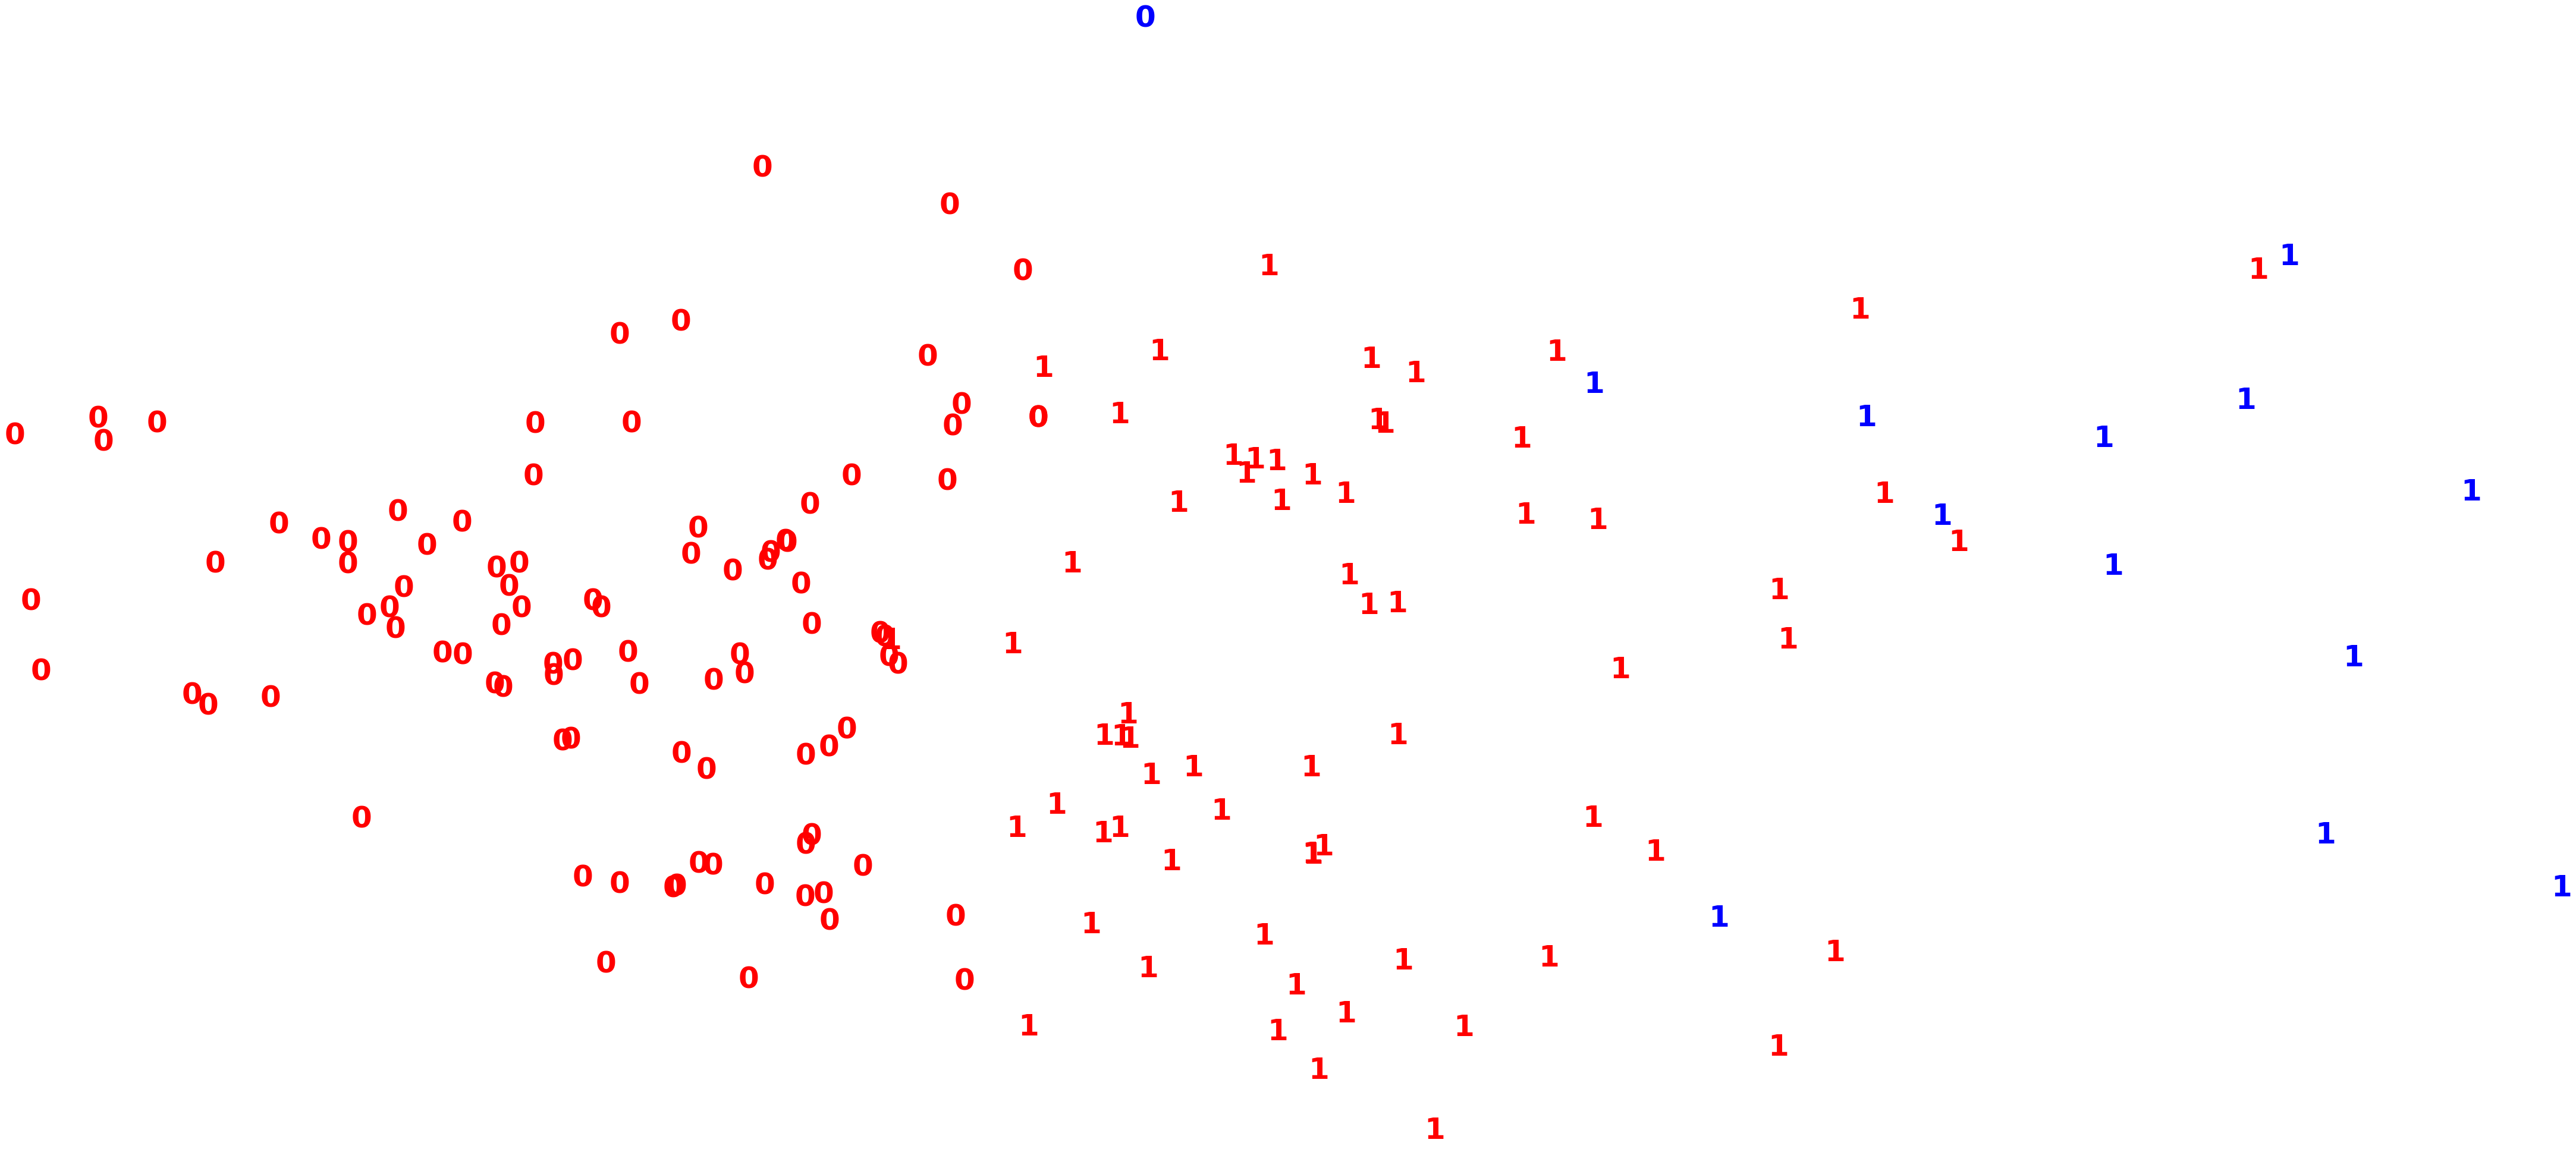

In [7]:

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

10.3 ms ± 974 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


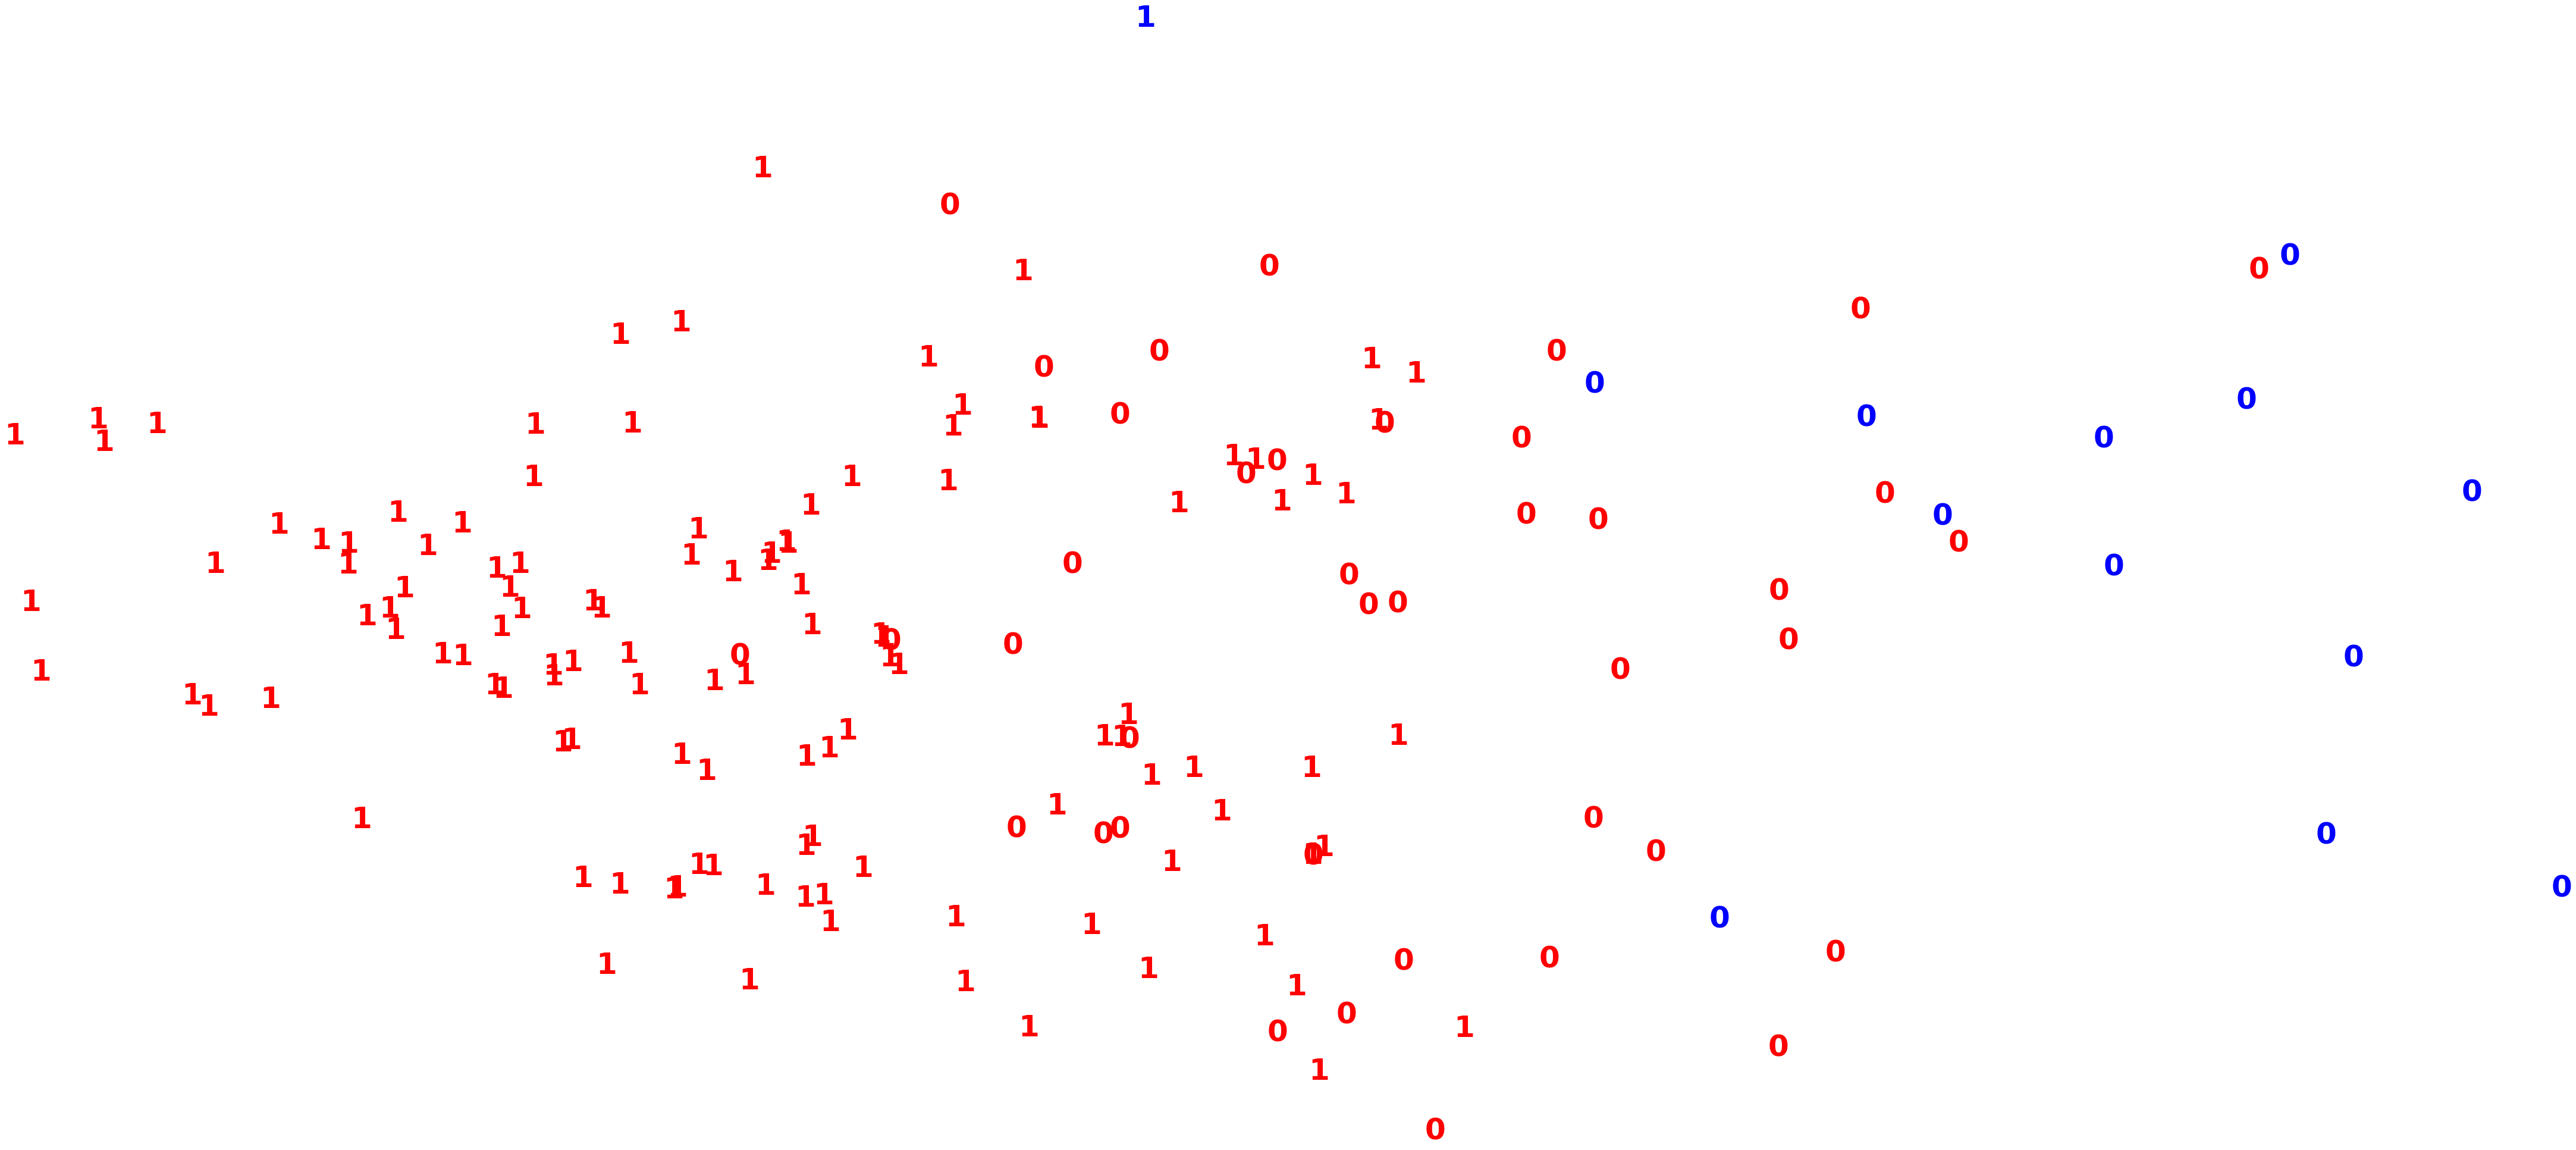

In [8]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()